In [1]:
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

#### Importo il dataset Titanic di kaggle 
* Lo trasformo in una matrice
* Dichiaro y come la colonna che ci indica quali sono i sopravvissuti
* Creo un nuovo dataset che saranno le nostre X con solo alcune specifiche colonne
* Codifico manualmente la colonna del sesso con maschio = 0 e femmina = 1

In [2]:
x = pd.read_csv("titanic.csv")

a = np.array(x)
y  = a[:,1] 

x = np.column_stack((x.Age, x.Fare, x.Parch, x.Pclass, x.Sex, x.SibSp))

x[:,4][x[:,4] == 'male'] = 0
x[:,4][x[:,4] == 'female'] = 1

#### Sostituisco i dati mancanti con la media dei dati nella colonna

In [3]:
columns_mean = np.nanmean(x, axis=0)
x[:, 0][pd.isna(x[:, 0])] = columns_mean[0]

#### Visualizzo la dimensionalita delle X e y

In [4]:
print(x.shape)
print(y.shape)

(891, 6)
(891,)


#### Divido manualmente il dataset in train e test

In [5]:
x_train = np.asarray(x[:800], dtype=np.float32)
y_train = np.asarray(y[:800], dtype=np.float32)

x_test = np.asarray(x[800:], dtype=np.float32)
y_test = np.asarray(y[800:], dtype=np.float32)

#### Utilizzo un Support Vector Machine con kernel Lineare  e lo addestro 

In [11]:
classifier = SVC(kernel='linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

#### Creo le predizioni sul dataset di test

In [7]:
preds = classifier.predict(x_test)

#### Visualizzo l'accuratezza del modello

In [8]:
print(accuracy_score(y_test, preds))

0.7692307692307693


#### Creo una matrice di confusione sulle y di test e le y predette per vedere quante ne ha indovinate e quante ne ha sbagliate

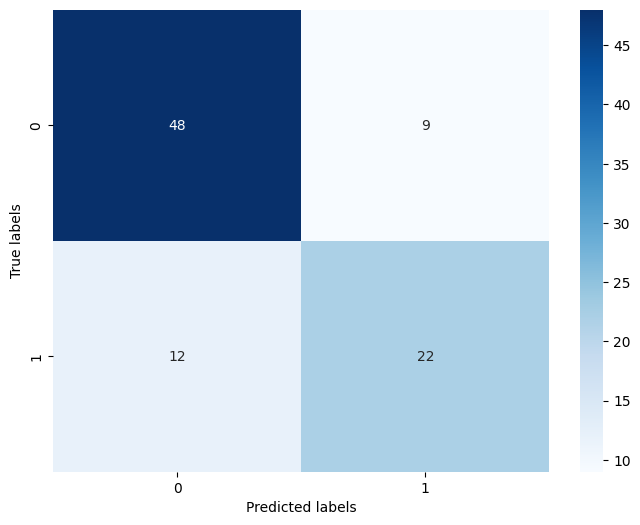

In [9]:
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

#### Eseguo l'addestramento sullo stesso dataset anche con i kernel:
* Polinomiale
* rbf
* Sigmoidale
#### Per vedere se con questo dataset performassero meglio, ma il kernel Lineare conferma l'accuracy migliore 

In [12]:
classifier = SVC(kernel='poly')
classifier.fit(x_train, y_train)
preds = classifier.predict(x_test)
print('Polynomial kernel', accuracy_score(y_test, preds))

classifier = SVC(kernel='rbf')
classifier.fit(x_train, y_train)
preds = classifier.predict(x_test)
print('Radial Basis Function kernel', accuracy_score(y_test, preds))

classifier = SVC(kernel='sigmoid')
classifier.fit(x_train, y_train)
preds = classifier.predict(x_test)
print('Sigmoid kernel', accuracy_score(y_test, preds))

Polynomial kernel 0.6703296703296703
Radial Basis Function kernel 0.6923076923076923
Sigmoid kernel 0.6483516483516484
